# **Extreme Gradient Boosting with XGBoost**

# Classification with XGBoost

In [1]:
# Import plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import xgboost as xgb
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'xgboost'

Supervised Learning
- Classification
    - binary: predict a person will buy insurance
        - metric: AUC (Area under the ROC Curve)
    - multi-class: classifying the species of a given bird in an image
        - metric: accuracy score, confusion matrix

common classification models: logistic regression, decision trees.

Supervised Learning considerations  
- Features can be either numeric or categorical
- Numeric features should be scaled (Z-scored)
    - e.g. essential to train SVM models
- Categorical features should be encoded (one-hot)

Other kinds of Supervised Learning problems
- Ranking: Predicting an ordering on a set of choices
    - Google search suggestions
- Recommendation: Recommending an item to a user based on his/her consumption history and profile
    - Netflix

### Introducing XGBoost

- Optimized gradient-boosting machine learning library  
- Originally written in C++  
- Why it is popular  
    - Speed and performance
    - Core algorithm is parallelizable
    - Consistently outperforms single-algorithm methods
    - State-of-the-art performance in many ML benchmark datasets


In [65]:
# Using XGBoost: A Quick Example

class_data = pd.read_csv("classification_data.csv")

X, y = class_data.iloc[:,:-1], class_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10, seed=123)

xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.040000


### What is a decision tree?

Decision Trees  
- Base learner - Individual learning algorithm in an ensemble algorithm
- Composed of a series of binary questions
- Predictions happen at the "leaves" of the tree
    - leaf nodes always contain decision values
- Constructed iteratively (one decision at a time)
    - Until a stopping criterion is met
- Individual decision trees tend to overfit
    - low bias, high variance
    - tend to overfit training data, and generalize poorly to new data
    

XGBoost
- Uses classification and regression trees (CART)
- Contain real-valued score in each leaf
    - regardless of classification or regression problem
    - can be thresholded to convert into categories for classification problems

In [66]:
# EXERCISES

In [67]:
# Decision trees

# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

In [68]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9736842105263158


### What is Boosting?

Boosting overview
- Not a specific machine learning algorithm
- Concept that can be applied to a set of machine learning models
    - "Meta-algorithm"
- Ensemble meta-algorithm used to convert many weak learners into a strong learner

- Weak learner: ML algorithm that is slightly better than chance
    - Example: Decision tree whose predictions are slightly better than 50%
- Boosting converts a collection of weak learners into a strong learner
- Strong learner: Any algorithm that can be tuned to achieve good performance

How boosting is accomplished
- Iteratively learning a set of weak models on subsets of the data
- Weighing each weak prediction according to each weak learner's performance
- Combine the weighted predictions to obtain a single weighted prediction that is much better than the individual predictions themselves!

Model evaluation through cross-validation  
- Cross-validation: Robust method for estimating the performance of a model on unseen data
- Generates many non-overlapping train/test splits on training data
- Reports the average test set performance across all data splits

num_boost_round: number of trees to run

In [8]:
# EXERCISES

In [15]:
# Measuring accuracy

# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.025480         0.002451         0.066824        0.019564
1          0.021969         0.001257         0.061524        0.013876
2          0.014945         0.006589         0.056252        0.010004
3          0.012306         0.003300         0.052734        0.011418
4          0.010549         0.004314         0.054497        0.012485
0.9455026666666666


In [10]:
# Measuring AUC

# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0       0.961473      0.024760        0.987225       0.001301
1       0.969078      0.022616        0.993244       0.004295
2       0.972491      0.024377        0.995224       0.003751
3       0.971354      0.025405        0.997125       0.002042
4       0.974002      0.026527        0.997610       0.001871
0.974002


### When should I use XGBoost?


When to use XGBoost
- You have a large number of training samples
    - Greater than 1000 training samples and less 100 features
    - The number of features < number of training samples
- You have a mixture of categorical and numeric features
    - Or just numeric features

When NOT to use XGBoost
- Image recognition
- Computer vision
- Natural language processing and understanding problems
- When the number of training samples is significantly smaller than the number of features

# Regression with XGBoost

In [16]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Regression review

Common regression metrics
- Root mean squared error (RMSE)
    - Treats negative and positive differences equally
    - Tends to punish larger differences more than smaller ones
- Mean absolute error (MAE)
    - Not affected by large error values as RMSE
    - Lacks nice mathematical properties
    - Less frequently used as evaluation metric

Common regression algorithms
- Linear regression
- Decision trees
    - Can be used for both regression/classification tasks
    - Important building block for XGBoost models

### Objective (loss) functions and base learners

Loss/Objective Functions

- Quantifies how far off a prediction is from the actual result  
- Measures the difference between estimated and true values for some collection of data  
- **Goal**: Find the model that yields the minimum value of the loss function

- Loss function names in xgboost:
    - **reg:squarederror** - use for regression problems
    - **reg:logistic** - use for classification problems when you want just decision, not probability
    - **binary:logistic** - use when you want probability rather than just decision

Base Learners

- XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
- Individual models = base learners
    - Want base learners that are slightly better than random guessing for some part of data but are uniformly bad for the remaining majority of the data.
    - When combined they create final prediction that is **non-linear**
    - Each base learner should be good at distinguishing or predicting different parts of the dataset
- Two kinds of base learners: **tree** and **linear**

In [59]:
# TREES BASE LEARNERS example: Scikit-learn API

boston_data = pd.read_csv("boston.csv")
X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10, seed=123)

xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

In [18]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 9.749041


In [51]:
# LINEAR BASE LEARNERS Example: Learning API Only

boston_data = pd.read_csv("boston.csv")
X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

# OPTIONS FOR BOOSTER: gbtree(default), gblinear or dart
params = {"booster":"gblinear","objective":"reg:squarederror"}

xg_reg = xgb.train(params = params, dtrain=DM_train,num_boost_round=10)
preds = xg_reg.predict(DM_test)

In [52]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 6.061921


In [53]:
# EXERCISES

In [54]:
# Decision trees as base learners

df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X.shape,y.shape

((1460, 56), (1460,))

In [55]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [56]:
# Linear base learners

# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain= DM_train, params=params, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44331.645061


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [57]:
# Evaluating model quality

# RMSE Model
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.488281      429.449371   142980.464844    1193.806011
1    102832.562500      322.503447   104891.398438    1223.161012
2     75872.621094      266.493573    79478.947266    1601.341377
3     57245.657226      273.633063    62411.919922    2220.151162
4     44401.291992      316.426590    51348.276367    2963.378029
4    51348.276367
Name: test-rmse-mean, dtype: float64


In [58]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.595704     668.167771  127634.185547   2404.009753
1    89770.031250     456.980559   90122.505860   2107.916842
2    63580.782226     263.442189   64278.558594   1887.552548
3    45633.181641     151.849960   46819.175782   1459.821979
4    33587.097657      87.003217   35670.655274   1140.613227
4    35670.655274
Name: test-mae-mean, dtype: float64


### Regularization and base learners in XGBoost

Regularization

- Regularization is a control on model complexity
- Want models that are both accurate and as simple as possible
- Tweak parameters to limit model complexity by altering loss function
- Regularization parameters in XGBoost:
    - gamma 
        - for tree base learners
        - controls whether a node on base learner split based on the expected reduction in the loss that would occur after performing the split
        - higher values lead to fewer splits
        - minimum loss reduction allowed for a split to occur
    - alpha 
        - another name for l1 regularization 
        - penalty on leaf weights rather than feature weights, as is the case in linear or logistic regression
        - higher alpha values mean more regularization, causes many leaf weights in the base learners to be 0
    - lambda 
        - another name for l2 regularization
        - much smoother penalty than l1
        - causes leaf weights to smoothly decrease instead of enforcing strong sparsity constraints on the leaf weights as in l1.

In [31]:
# L1 Regularization in XGBoost example

boston_data = pd.read_csv("boston.csv")
X,y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]

boston_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:linear","max_depth":4}

l1_params = [1,10,100]
rmses_l1=[]

for reg in l1_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=boston_dmatrix, params=params,
                        nfold=4, num_boost_round=10,
                        metrics="rmse", as_pandas=True, seed=123)
    rmses_l1.append(cv_results["test-rmse-mean"] \
                    .tail(1).values[0])

[17:13:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:04] WARNI

In [32]:
print("Best rmse as a function of l1:")
print(pd.DataFrame(list(zip(l1_params,rmses_l1)),columns=["l1","rmse"]))

Best rmse as a function of l1:
    l1      rmse
0    1  3.461474
1   10  3.821152
2  100  4.645519


Base learners in XGBoost

- Linear Base Learner:
    - Sum of linear terms (same as in linear/logistic regression models)
    - When combined into an ensemble, the boosted model is weighted sum of linear models (thus is itself linear)
    - Don't get any nonlinear combination of features in the final model
    - Rarely used
- Tree Base Learner:
    - Decision trees as base model
    - When combined into an ensemble, boosted model is weighted sum of decision trees (nonlinear)
    - Almost exclusively used in XGBoost

In [33]:
# EXERCISES

In [34]:
# Using L2 regularization in XGBoost

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

[17:13:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a f

[17:13:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


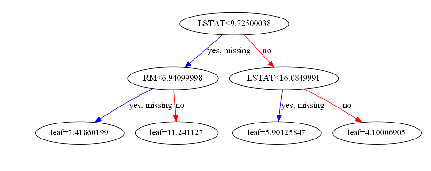

In [35]:
# Visualizing individual XGBoost trees

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams["figure.figsize"] = [7,7]
plt.show()

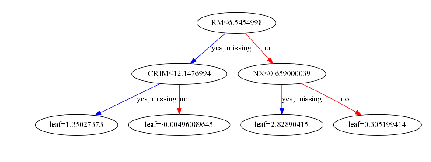

In [36]:
# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.rcParams["figure.figsize"] = [7,7]
plt.show()

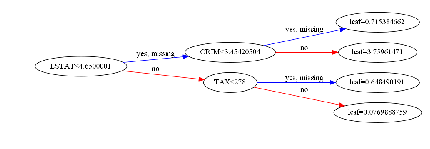

In [37]:
# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9,rankdir="LR")
plt.rcParams["figure.figsize"] = [10,10]
plt.show()

[17:14:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


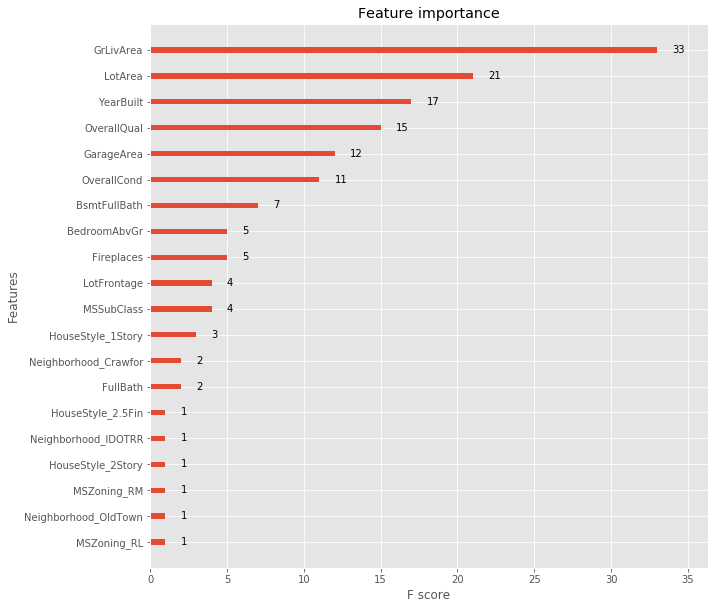

In [39]:
# Visualizing feature importances: What features are most important in my dataset

# Create the DMatrix: housing_dmatrix
df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.iloc[:,:-1],df.iloc[:,-1]
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {'objective':'reg:linear',
    'max_depth':4
}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=housing_dmatrix,params=params,num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# Fine-tuning your XGBoost model

In [40]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Why tune your model?

In [42]:
# Untuned Model Example

housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X,y = housing_data[housing_data.columns.tolist()[:-1]],housing_data[housing_data.columns.tolist()[-1]]

housing_dmatrix = xgb.DMatrix(data=X,label=y)
untuned_params={"objective":"reg:linear"}

untuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,params=untuned_params,
                                 nfold=4,metrics="rmse",as_pandas=True,seed=123)

print("Untuned rmse: %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

[17:35:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Untuned rmse: 34624.230957


In [43]:
# Tuned Model Example

housing_dmatrix = xgb.DMatrix(data=X,label=y)
tuned_params = {"objective":"reg:linear",'colsample_bytree': 0.3,
                'learning_rate': 0.1, 'max_depth': 5}

tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,params=tuned_params, 
                               nfold=4, num_boost_round=200, metrics="rmse",
                               as_pandas=True, seed=123)

print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

[17:37:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tuned rmse: 29965.407715


In [33]:
# EXERCISES

In [44]:
# Tuning the number of boosting rounds

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail(1).values[0])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))


[17:37:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:41] WARNI

In [45]:
# Automated boosting round selection using early_stopping

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,num_boost_round=50,nfold=3,metrics='rmse',early_stopping_rounds=10,as_pandas=True,seed=123)

# Print cv_results
print(cv_results.tail())

[17:37:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45     11356.550781      565.367451    30758.544271    1947.456794
46     11193.557292      552.298192    30729.973307    1985.701585
47     11071.317383      604.088404    30732.662760    1966.997355
48     10950.777018      574.864279    30712.243490    1957.751584
49     10824.865885      576.664748    30720.852214    1950.513825


### Overview of XGBoost's hyperparameters

Common TREE tunable parameters
- eta: 
    - learning rate - value between 0 and 1
    - affects how quickly the model fits the residual error using additional base learners
    - low learning rate will require more boosting rounds to achieve the same reduction in residual error as an XGBoost model with high learning rate
- gamma: 
    - min loss reduction to create new tree split
- lambda: 
    - L2 reg on leaf weights
- alpha: 
    - L1 reg on leaf weights
- max_depth: 
    - max depth per tree
    - must be a positive integer value
    - affects how deeply each tree is allowed to grow during any given boosting round
- subsample: 
    - % samples used per tree
    - must be a value between 0 and 1
    - fraction of the total training set that can be used for any given boosting round
    - if value is low, fraction of training data used per boosting round would be low, causing underfitting problems.
    - if value is very high, can lead to overfitting
- colsample_bytree: 
    - % features used per tree
    - fraction of features that you can select from during any given boosting round
    - same as RandomForest 'max_features' attribute
    - must also be a value between 0 and 1
    - large value means almost all features can be used to build a tree during a boosting
        - may in certain cases overfit a trained model
    - small value means that the fraction of features that can be selected from is very small.
        - smaller values can be thought of as providing additional regularization to the model
- n_estimators / no. of boosting rounds is tunable in both models
    - either no. of trees to build
    - or no. of linear base learners to construct

LINEAR tunable parameters
- no. of tunable parameters is significantly smaller
    
- lambda:
    - L2 reg on weights associated with any given feature
- alpha:
    - L1 reg on weights
- lambda_bias:
    - L2 reg term on model's bias

In [46]:
# Tuning eta

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:
    params["eta"] = curr_val
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=3,
                        num_boost_round=10,early_stopping_rounds=5,
                        metrics='rmse',seed=123)
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

[17:38:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNI

In [47]:
# Tuning max_depth

# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:
    params["max_depth"] = curr_val 
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,metrics='rmse',
                        num_boost_round=10,early_stopping_rounds=5,
                        nfold=2,as_pandas=True,seed=123)
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

[17:38:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:41] WARNI

In [48]:
# Tuning colsample_bytree

# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

[17:38:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:44] WARNI

### Review of Grid Search and Random Search

- Hyperparameter values interact in non-obvious/non-linear ways
- Two common search strategies are:
    - Grid search
    - Random search
- both can be used with XGBoost and scikit-learn packages

Grid Search: Review

- Search exhaustively over a given set of hyperparameters, once per set of hyperparameters
- Number of models = number of distinct values per hyperparameter multiplied across each hyperparameter
    - for 2 hyperparameters to tune with 4 possible values for each, total number of models tried by grid search will be 16
- Pick final model hyperparameter values that give best cross-validated evaluation metric value

In [49]:
# Grid Search: Example

from sklearn.model_selection import GridSearchCV

housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X,label=y)

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                  'n_estimators': [200],
                  'subsample': [0.3, 0.5, 0.9]}

gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm, cv=4, verbose=1, 
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error')
grid_mse.fit(X, y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[17:39:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:40:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.3min finished
C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\aakyn\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:40:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 0.9], 'n_estimators': [200], 'subsample': [0.3, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [41]:
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE found:  28574.9861732


Random Search: Review

- Significantly different from Grid search
- No. of models required to iterate over doesn't grow as you expand the overall hyperparameter space
- Create a (possibly infinite) range of hyperparameter values per hyperparameter that you would like to search over
- Set the number of iterations you would like for the random search to continue
- During each iteration, randomly draw a value in the range of specified values for each hyperparameter searched over and train/evaluate a model with those hyperparameters
- After you've reached the maximum number of iterations, select the hyperparameter configuration with the best evaluated score

In [42]:
# Random Search: Example

from sklearn.model_selection import RandomizedSearchCV

housing_data = pd.read_csv("datasets/ames_housing_trimmed_processed.csv")
X,y = housing_data[housing_data.columns.tolist()[:-1]],housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X,label=y)

gbm_param_grid = {'learning_rate': np.arange(0.05,1.05,.05),
                  'n_estimators': [200],
                  'subsample': np.arange(0.05,1.05,.05)}

gbm = xgb.XGBRegressor()
randomized_mse = RandomizedSearchCV(estimator=gbm, n_iter=25,
                                    scoring='neg_mean_squared_error', 
                                    param_distributions=gbm_param_grid,
                                    cv=4, verbose=1)
randomized_mse.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.1s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=25, n_jobs=1,
          param_distributions={'learning_rate': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]), 'n_estimators': [200], 'subsample': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return

In [50]:
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ",np.sqrt(np.abs(randomized_mse.best_score_)))

NameError: name 'randomized_mse' is not defined

In [44]:
# EXERCISES

In [45]:
# Grid Search with XGBoost

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,cv=4,scoring='neg_mean_squared_error',verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  30031.6171206


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.2s finished


In [46]:
# Random Search with XGBoost

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm,cv=4,n_iter=5,verbose=1,
                                    param_distributions=gbm_param_grid,
                                    scoring='neg_mean_squared_error')

# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.4s finished


Best parameters found:  {'n_estimators': 25, 'max_depth': 11}
Lowest RMSE found:  37502.1924786


### Limits of Grid Search and Random Search

Grid Search
- Number of models you must build with every additional new parameter grows very quickly
- Optimal if no. of hyperparameters and distinct values per hyperparameter is kept small
- Time taken increases exponentially

Random Search
- Parameter space to explore can be massive 
- Randomly jumping throughout the space looking for a "best" result becomes a waiting game

----

### Final Thoughts

What We Have Covered And You Have Learned

- Using XGBoost for classification tasks
- Using XGBoost for regression tasks
- Tuning XGBoost's most important hyperparameters
- Incorporating XGBoost into sklearn pipelines
- Advanced functions that allow us to seamlessly work with Pandas DataFrames and scikit-learn.

What We Have NOT COVERED (And How You Can Proceed)

- Using XGBoost for ranking/recommendation problems (Netflix/Amazon problem)
    - can be done by modifying the loss function we use when constructing the model
- Using more sophisticated hyperparameter tuning strategies for tuning XGBoost models (Bayesian Optimization)
    - entire companies have been created just for using this method in tuning models.
    - example: the company 'sigpot'
- Using XGBoost as part of an ensemble of other models for regression/classification
    - predictions we get from XGBoost model can be combined with other models
    - very powerful additional way to squeeze the last bit of juice from the data.